In [ ]:
##Logisticregression ##
## Normalisation of data. it need tobe done after split ##

# from sklearn.model_selection import train_test_split

# X = RW_Wine_new.drop('wine_type', axis=1)
# y = RW_Wine_new['wine_type']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler ()
# scaler.fit(X_train)
# X_train_Scaled = scaler.transform(X_train)
# X_test_Scaled = scaler.transform(X_test)

# #now Check logistic regression again ##

# from sklearn.linear_model import LogisticRegression
# LR_model = LogisticRegression(random_state=42)
# LR_model.fit(X_train_Scaled,y_train)
# Predic = LR_model.predict(X_test_Scaled)

# from sklearn.metrics import accuracy_score
# acc=accuracy_score(y_test,Predic)
# print ("liner reg is", acc)

# ## RandomForest ##

# from sklearn.ensemble import RandomForestClassifier

# RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453)
# RF_clf.fit(X_train_Scaled,y_train)
# Predic = RF_clf.predict(X_test_Scaled)

# from sklearn.metrics import accuracy_score

# acc_r = accuracy_score(y_test, Predic)
# print ("liner reg is", acc_r)


## Hyperparameter ##

# # Creating a Parameter Grid for Hyperparameter Tuning in Random Forest. 
# In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters that are used to tune the Logistic Regression model performance.
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# param_grid_Red = {
#     'n_estimators': [100, 200, 300, 500],         # Number of trees
#     'max_depth': [None, 10, 20, 30],         # Max depth of trees
#     'min_samples_split': [2, 5],             # Min samples to split a node
#     'min_samples_leaf': [1, 2],              # Min samples at a leaf node        # Features to consider per split
#     'bootstrap': [True, False]               # Use bootstrap samples
# }
# RF_clf = RandomForestClassifier(random_state=101)
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Grid_search_R = GridSearchCV(RF_clf,param_grid = param_grid_Red, cv = stratified_kfold,  verbose=True,n_jobs=-1, scoring='accuracy')

# Grid_search_R.fit(X_train, y_train)
# best_Param = Grid_search_R.best_params_
# print (best_Param, Grid_search_R.best_score_)

# out put of hyperparameter ##
# Fitting 5 folds for each of 128 candidates, totalling 640 fits
# {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300} 0.80070067264574

#White wine output
# Fitting 5 folds for each of 128 candidates, totalling 640 fits
# {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500} 0.7981132874605781




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
R_Wine = pd.read_csv(r'c:\Data Analysis\Wine Dataset\winequality-red.csv', sep= ';') 
W_wine = pd.read_csv(r'c:\Data Analysis\Wine Dataset\winequality-white.csv', sep= ';')
R_Wine['wine_type'] = 0
W_wine['wine_type'] = 1

RW_Wine = pd.concat([R_Wine,W_wine], ignore_index=True)
RW_Wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [17]:
# check if File have Duplicate
RW_Wine.duplicated().sum()

np.int64(1177)

In [18]:
# Remove the duplicate
RW_Wine_new = RW_Wine.drop_duplicates()

In [19]:
RW_Wine_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


In [20]:
P = RW_Wine_new.duplicated().sum()
print (P)

0


In [21]:
RW_Wine_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


<Axes: >

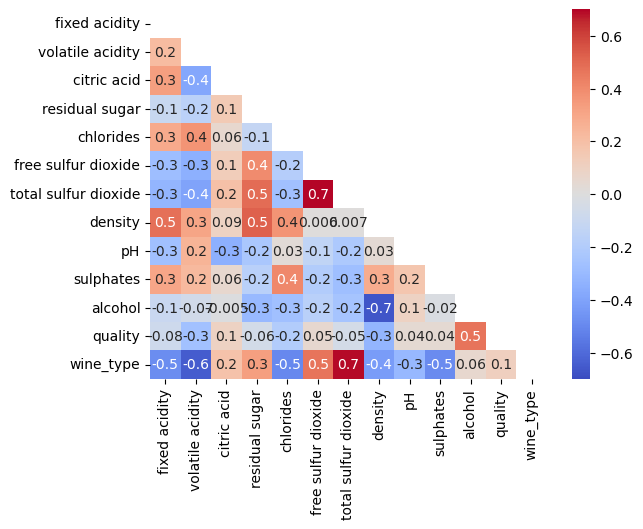

In [22]:
RW_matrix = np.triu(RW_Wine_new.corr(numeric_only=True))
sns.heatmap (RW_Wine_new.corr(numeric_only=True),annot=True,cmap='coolwarm', fmt='.1g',mask=RW_matrix, vmin=-0.7,vmax=0.7)

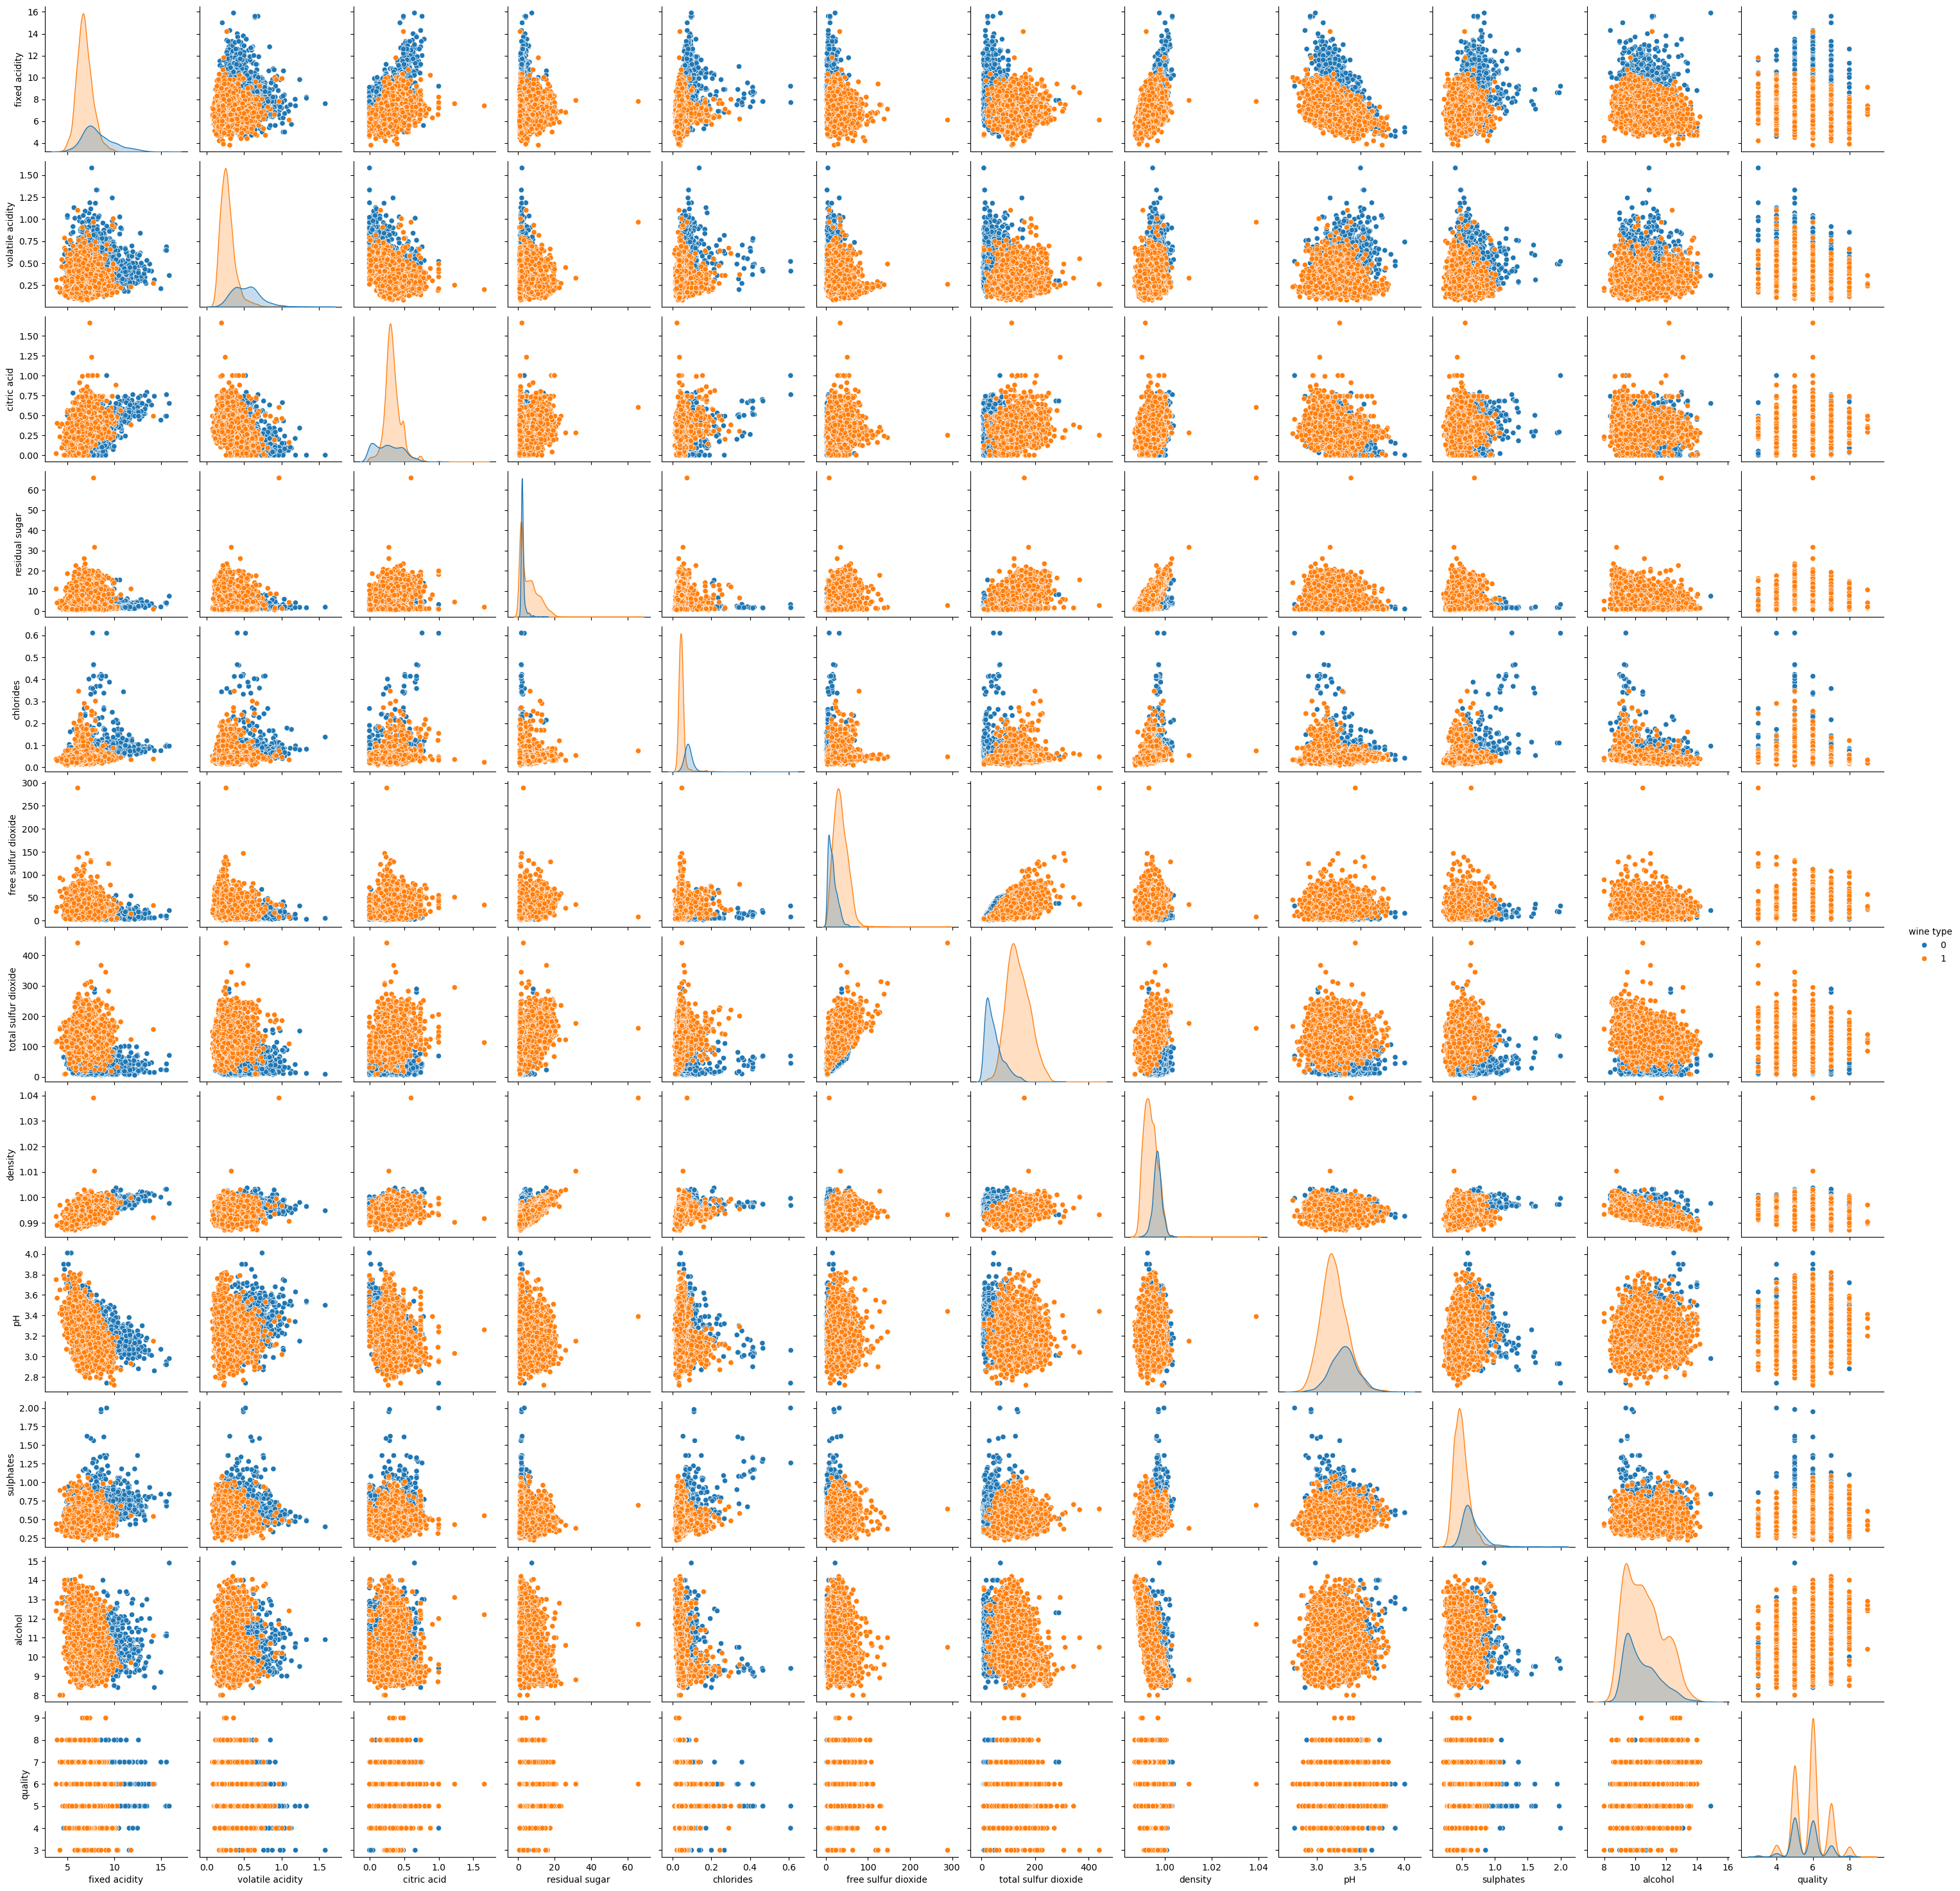

In [ ]:
sns.pairplot(data= RW_Wine_new, hue='wine_type')

In [ ]:
## to see groupby

#RW_Wine_new.groupby(['first group or coloumn','second group or coloumn'])['second group or coloumn'].count()

## count plot by ages in groups
#bins = [0,20,40,60,80]
#sns.countplot(X=pd.cut(RW_Wine_new.Age, bins=bins),hue=RW_Wine_new.Wine type)

In [23]:
# check if have String col. whih is not numerical
String_col = RW_Wine_new.select_dtypes(include='object').columns
RW_Wine_new[String_col].head()

## if have columns with objects means non numerical then below programm show values. current case no Object Columns.

# for col in String_col:
#     print(f"the distribustion of catagorical values in the {col} is :")
#     print(RW_Wine_new[col].value_counts())

""
0
1
2
3
5


In [ ]:
## incoding as normally all data should be numerical, otherwise we have to convert it. ##

##use replace when column have only two catagories
# RW_Wine_new['wine type'].replace({'red':0, 'white':1}, inplace=True) 

# ## using 'pd.get_dummies()' it changes all objects in to new columns
# Cat_cols = RW_Wine_new.select_dtypes('object') # here findout columns which have data type is objects
# Cat_col_encode = pd.get_dummies(Cat_cols) # here each object turns into new column and then if value true then assign it 1 like boolens

# RW_Wine_new.drop(columns=Cat_cols, axis=1, inplace=True) # here we drop orignal colums, weil we have now diff. col. for each obj. in that col.
# RW_Wine_new_L = pd.concat ([RW_Wine_new, Cat_col_encode], axis=1) # here we merge new object file to orignal file

#Like above way we remove Objects from tabel to numbers


In [48]:
RW_Wine_new.head()
RW_Wine_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [49]:
## import model from SKlearn

from sklearn.model_selection import train_test_split

## Split data into X (capital) and y (small)

X = RW_Wine_new.drop('wine_type', axis=1)
y = RW_Wine_new['wine_type']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test size 0.2 mean 20 % --> Train 80 % (X_train, y_train) and test 20 % (X_test,y_test)


In [50]:
X_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 3103 to 1011
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4256 non-null   float64
 1   volatile acidity      4256 non-null   float64
 2   citric acid           4256 non-null   float64
 3   residual sugar        4256 non-null   float64
 4   chlorides             4256 non-null   float64
 5   free sulfur dioxide   4256 non-null   float64
 6   total sulfur dioxide  4256 non-null   float64
 7   density               4256 non-null   float64
 8   pH                    4256 non-null   float64
 9   sulphates             4256 non-null   float64
 10  alcohol               4256 non-null   float64
 11  quality               4256 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 432.2 KB
<class 'pandas.core.series.Series'>
Index: 1064 entries, 2221 to 5578
Series name: wine_type
Non-Null Count  Dtype
-------------

In [51]:
## Liner regression complete file ##

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42, max_iter=1000) ## Logistic Regression model
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
## Prdiction

Predic = LR_model.predict(X_test)
Predic
y_test

2221    1
6167    1
4500    1
5051    1
639     0
       ..
5779    1
2005    1
6360    1
150     0
5578    1
Name: wine_type, Length: 1064, dtype: int64

In [53]:
## check X_test prediction accuracy with y_test

from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))



              precision    recall  f1-score   support

           0       0.98      0.97      0.98       289
           1       0.99      0.99      0.99       775

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064



In [54]:
# confusion matrix. diagonal are correct one

from sklearn.metrics import confusion_matrix

confusion_matrix (y_test,Predic)


array([[280,   9],
       [  5, 770]])

In [ ]:
## Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier


RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453) ## random stae is set for 1 model everytime same.
RF_clf.fit(X_train,y_train)
Predic = RF_clf.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, Predic)
acc

0.9971804511278195

In [ ]:
## Normalisation of data. it need tobe done after split ##

from sklearn.model_selection import train_test_split

X = RW_Wine_new.drop('wine_type', axis=1)
y = RW_Wine_new['wine_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

#now Check liner regression again

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_Scaled,y_train)
Predic = LR_model.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,Predic)
print ("liner reg is", acc)

## RandomForest

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453)
RF_clf.fit(X_train_Scaled,y_train)
Predic = RF_clf.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score

acc_r = accuracy_score(y_test, Predic)
print ("liner reg is", acc_r)


liner reg is 0.9868421052631579
liner reg is 0.9971804511278195


In [62]:
RW_Wine_newd=RW_Wine_new.drop(['alcohol','quality'], axis=1)
RW_Wine_newd.head()
RW_Wine_newd.info()
#RW_Wine_new.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  wine_type             5320 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 498.8 KB


In [63]:
from sklearn.model_selection import train_test_split

X = RW_Wine_newd.drop('wine_type', axis=1) ## split
y = RW_Wine_newd['wine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42, max_iter=1000) ## Logistic Regression model
LR_model.fit(X_train,y_train)

Predic = LR_model.predict(X_test)
Predic

from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))

from sklearn.metrics import confusion_matrix

confusion_matrix (y_test,Predic)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       289
           1       0.99      0.99      0.99       775

    accuracy                           0.98      1064
   macro avg       0.98      0.98      0.98      1064
weighted avg       0.98      0.98      0.98      1064



array([[279,  10],
       [  8, 767]])

In [64]:
## Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453) ## random stae is set for 1 model everytime same.
RF_clf.fit(X_train,y_train)
Predic = RF_clf.predict(X_test)
acc = accuracy_score(y_test, Predic)
acc

0.9971804511278195